In [1]:
#Importing Packages
from functools import reduce
import pandas as pd
import warnings
import seaborn as sn
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
#Reading CSV Files
df_cas = pd.read_csv('Customer Attrition Status.csv')
df_cdg = pd.read_csv('Customer Demographics.csv')
df_cis = pd.read_csv('Customer Investment Snapshot.csv')
df_cps = pd.read_csv('Customer Portfolio Snapshot.csv')

In [4]:
df_cas.head(), df_cdg.head(), df_cis.head(), df_cps.head()

(   RowNumber  CustomerId  Exited
 0          1  15634602.0     1.0
 1          2  15647311.0     0.0
 2          3  15619304.0     1.0
 3          4  15701354.0     0.0
 4          5  15737888.0     0.0,
    RowNumber  CustomerId   Surname Geography  Gender   Age
 0          1  15634602.0  Hargrave      West  Female  42.0
 1          2  15647311.0      Hill   Central  Female  41.0
 2          3  15619304.0      Onio      West  Female  42.0
 3          4  15701354.0      Boni      West  Female  39.0
 4          5  15737888.0  Mitchell   Central  Female  43.0,
    RowNumber  CustomerId  Tenure  CreditScore    Balance  EstimatedSalary
 0          1  15634602.0     2.0        619.0        NaN        101348.88
 1          2  15647311.0     1.0        608.0   83807.86        112542.58
 2          3  15619304.0     8.0        502.0  159660.80        113931.57
 3          4  15701354.0     1.0        699.0        NaN         93826.63
 4          5  15737888.0     2.0        850.0  125510.82  

In [5]:
# Merging all CSV Based on Columns - 'RowNumber','CustomerId' which are unique and present across files
df = reduce(lambda x,y: pd.merge(x,y, on=['RowNumber','CustomerId'], how='outer'), [df_cas, df_cdg, df_cis, df_cps])
#Dropping duplicates
df1 = df.drop_duplicates(keep='first',inplace=False)
df1.columns

Index(['RowNumber', 'CustomerId', 'Exited', 'Surname', 'Geography', 'Gender',
       'Age', 'Tenure', 'CreditScore', 'Balance', 'EstimatedSalary',
       'NumOfProducts', 'HasChckng', 'IsActiveMember'],
      dtype='object')

In [6]:
## Changing Column Order as per Final CSV Format
column_names = ['RowNumber', 'CustomerId','Surname','CreditScore','Geography','Gender','Age', 'Tenure','Balance','NumOfProducts','HasChckng', 'IsActiveMember','EstimatedSalary','Exited']
df2 = df1[column_names]
df2.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasChckng',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df2.isnull().sum()

RowNumber             0
CustomerId           19
Surname              38
CreditScore          41
Geography            38
Gender               38
Age                  38
Tenure               38
Balance            3655
NumOfProducts        38
HasChckng            38
IsActiveMember       38
EstimatedSalary      38
Exited               38
dtype: int64

In [9]:
## Replacing Null values by Forward filling from Neighbours
df2.fillna(method='ffill', inplace=True)
df2.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            1
NumOfProducts      0
HasChckng          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
#Still there are some Null values in Balance Column, So replacing with Mean
df2['Balance'].fillna(df2['Balance'].mean(), inplace = True)
df2.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasChckng          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
df2["Exited"]=df2["Exited"].astype(int)
df2.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
0,1,15634602.0,Hargrave,619.0,West,Female,42.0,2.0,119607.725905,1.0,1.0,1.0,101348.88,1
1,2,15647311.0,Hill,608.0,Central,Female,41.0,1.0,83807.860000,1.0,0.0,1.0,112542.58,0
2,3,15619304.0,Onio,502.0,West,Female,42.0,8.0,159660.800000,3.0,1.0,0.0,113931.57,1
3,4,15701354.0,Boni,699.0,West,Female,39.0,1.0,159660.800000,2.0,0.0,0.0,93826.63,0
4,5,15737888.0,Mitchell,850.0,Central,Female,43.0,2.0,125510.820000,1.0,1.0,1.0,79084.10,0


In [16]:
## Now we dont have any Null values, So finding out Numbers. For ex: Number of people exited & Active in Geograpy
df3 = df2.groupby(['Geography','Exited']).size()
df3

Geography  Exited
Central    0         2064
           1          413
East       0         1695
           1          814
West       0         4242
           1          810
dtype: int64

In [18]:
df2.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.006975,0.016323,-0.007159,-0.010257,0.004038,0.001249,0.004812,0.005233,-0.012957,-0.019772
CustomerId,0.006975,1.000000,0.008240,0.006903,-0.015773,-0.004482,0.015402,-0.012912,-0.000020,0.013433,-0.007046
CreditScore,0.016323,0.008240,1.000000,-0.009681,-0.004148,-0.000737,0.007190,-0.002283,0.019915,-0.008422,-0.030274
Age,-0.007159,0.006903,-0.009681,1.000000,-0.007642,-0.018092,-0.025017,-0.015757,0.086028,-0.004959,0.282174
Tenure,-0.010257,-0.015773,-0.004148,-0.007642,1.000000,0.008726,0.018371,0.022200,-0.027753,0.009457,-0.011500
Balance,0.004038,-0.004482,-0.000737,-0.018092,0.008726,1.000000,-0.011073,0.014215,-0.013113,-0.001177,0.011379
NumOfProducts,0.001249,0.015402,0.007190,-0.025017,0.018371,-0.011073,1.000000,0.000951,0.013122,0.017851,-0.045980
HasChckng,0.004812,-0.012912,-0.002283,-0.015757,0.022200,0.014215,0.000951,1.000000,-0.014346,-0.012529,-0.008364
IsActiveMember,0.005233,-0.000020,0.019915,0.086028,-0.027753,-0.013113,0.013122,-0.014346,1.000000,-0.007192,-0.153771
EstimatedSalary,-0.012957,0.013433,-0.008422,-0.004959,0.009457,-0.001177,0.017851,-0.012529,-0.007192,1.000000,0.014120


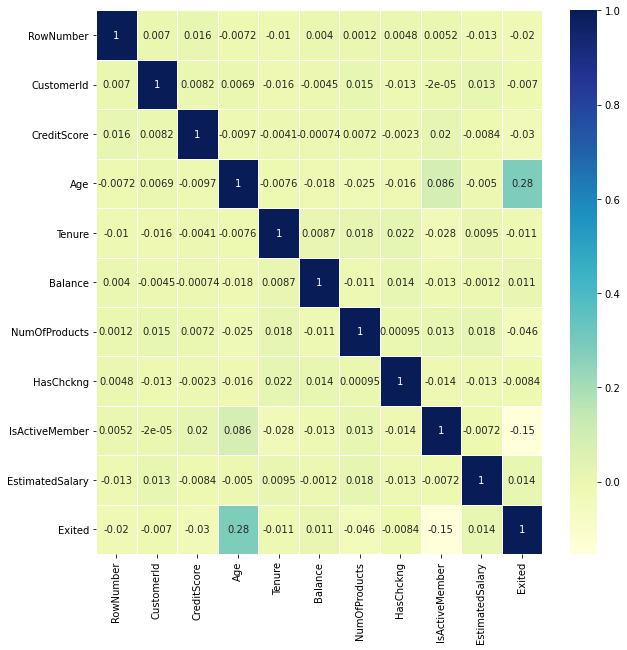

In [21]:
plt.figure(figsize = (10, 10))
corr = df2.corr()
sn.heatmap(corr, cmap="YlGnBu", annot = True,linewidths = 0.5,)
plt.show()

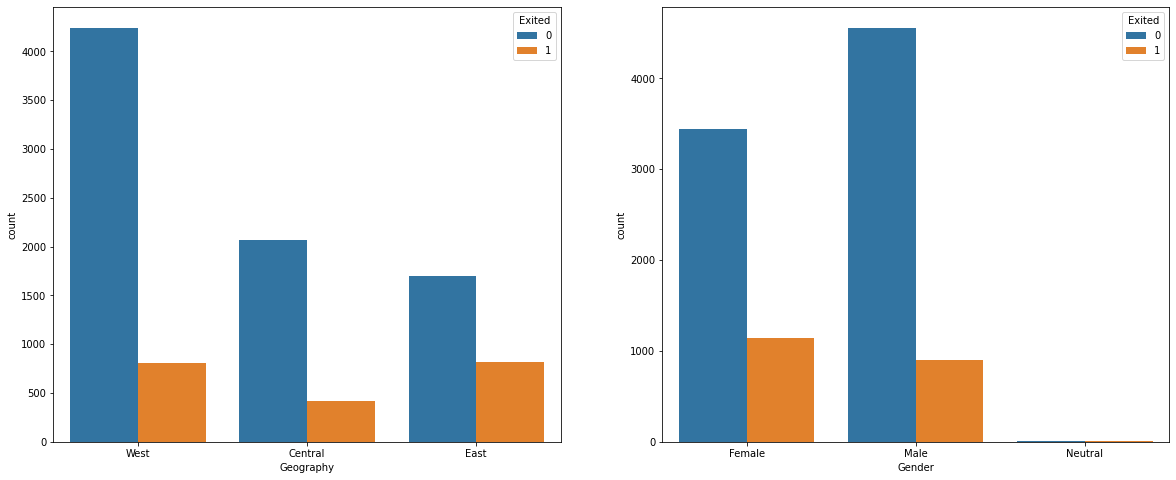

In [23]:
## Countplot for Number of People exited based on Gender & Geography
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sn.countplot(x="Geography",data=df2, hue ="Exited", ax=ax1)
sn.countplot(x="Gender",data=df2, hue ="Exited", ax=ax2)
plt.show()

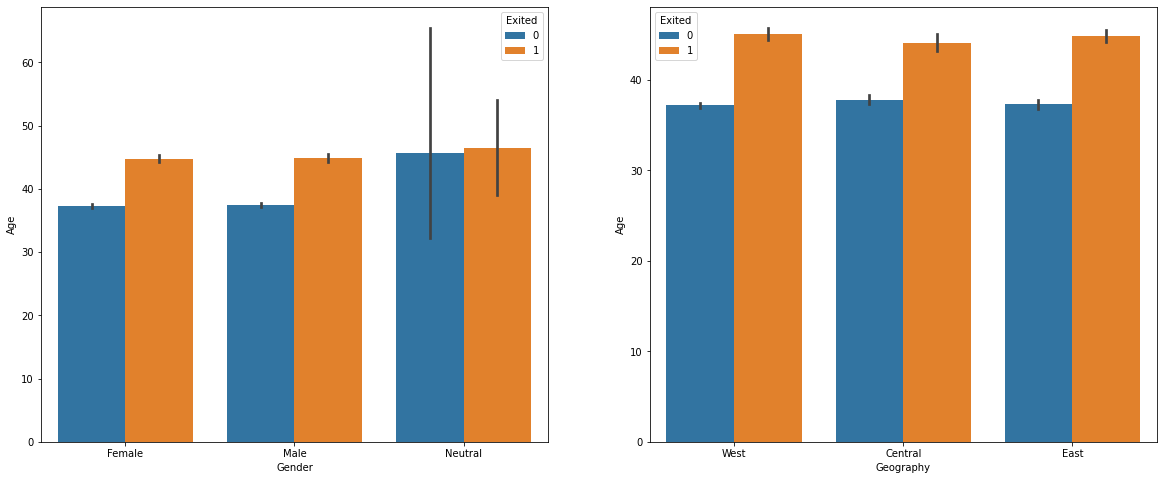

In [30]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sn.barplot(x="Gender", y="Age",data=df2,hue="Exited", ax=ax1)
sn.barplot(x="Geography", y="Age",data=df2,hue="Exited", ax=ax2)
plt.show()

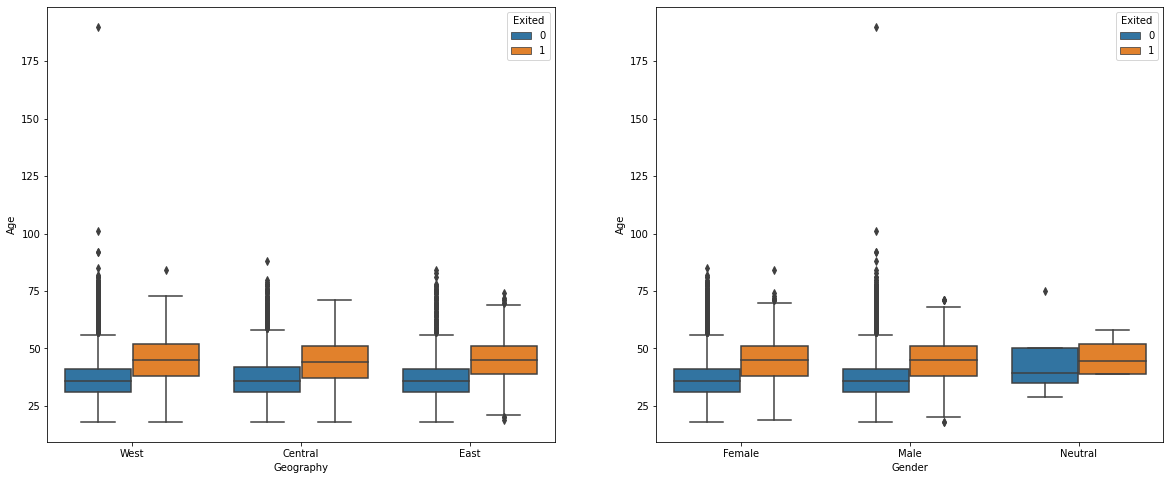

In [34]:
##Lets do check the same in Boxplot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sn.boxplot(data=df2, x="Geography",y="Age",hue="Exited",ax=ax1)
sn.boxplot(data=df2, x="Gender",y="Age",hue="Exited", ax=ax2)
plt.show()

In [42]:
print("Done")

Done


In [43]:
# Saving Final dataframe into CSV
df2.to_csv('customer_churn_analysis_final.csv', index=False)